In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path="../output_videos/cropped_image.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #convert to RGB

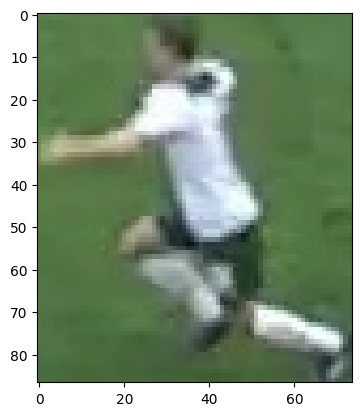

In [3]:
plt.imshow(image)
plt.show()

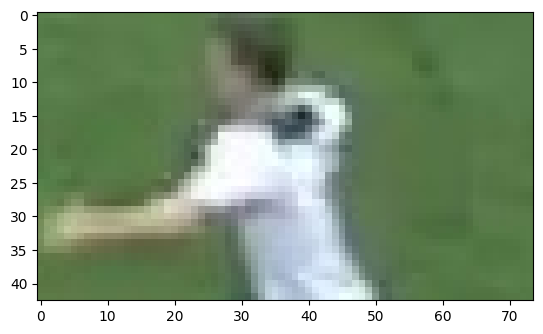

In [4]:
# Taking the top half of the image (Considering only the jersey)
top_half_image= image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

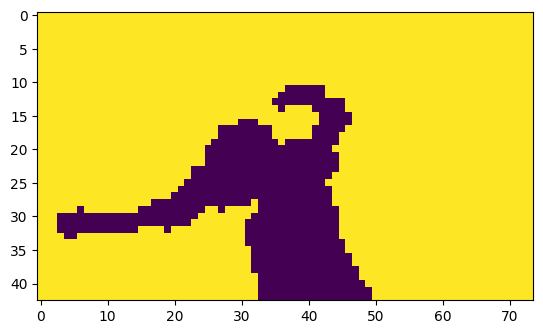

In [6]:
# Removing the background color from the jersey color.
# Cluster the image into 2
# Reshape the image into 2d array

image_2d = top_half_image.reshape(-1, 3)

# performing K-means clustering with 2 clusters
kmeans=KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Getting the cluster labels
labels=kmeans.labels_

# reshape the lables into the original image shape
clustered_image=labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()


In [7]:
# K-means assigns random labels to the clusters. We need to find the cluster with the jersey color  
corner_clusters=[clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]] # Taking the corner pixels of the image    

non_player_cluster=max(set(corner_clusters), key=corner_clusters.count) # Taking the cluster with the maximum frequency

player_cluster=1-non_player_cluster # The other cluster is the player cluster

In [8]:
kmeans.cluster_centers_[player_cluster] # The cluster center of the player cluster, which is the jersey color

array([198.69479354, 209.005386  , 211.68222621])